# Module I - Assignment

You can complete this by yourself or with 1-2 other people. List all names at the top of the module when you submit.

## Problem 1a

DrinkBetter is a company in New York that specializes in producing sustainable straws and cups. They supply directly to restaurants and would like to leverage the Yelp API to assist them in targetting NYC restaurants.

Based off of their experience, they've found that the following characteristics make a restaurant more likely to become a customer:
- Price is \$\$ or more
- The restaurant is located in either Manhatttan or Brooklyn
- Delivery is offered
- They have at least 50 reviews

Use the Yelp API to write a function that returns a list of restaurants that DrinkBetter should target
- If you use the API key and Client ID within this notebook, then remove them before submitting

## Problem 1b

Write two more functions with the Yelp API that DrinkBetter might find useful.
- Provide your reasoning for why these functions would be useful
- Do not copy a function from the API - Case notebook

In [1]:
import numpy as np # data processing libraries
import pandas as pd

import matplotlib.pyplot as plt # data visualization librarY

import requests # for grabbing web requests
import json # common data typee goes here

CLIENT_ID = "" 
API_KEY = "" 

API_HOST = 'https://api.yelp.com' #The API url header
SEARCH_PATH = '/v3/businesses/search' #The path for an API request to find businesses
BUSINESS_PATH = '/v3/businesses/'  # The path to get data for a single business

def get_restaurants(api_key,location):
    import requests
    
    #First we get the access token
    #Set up the search data dictionary
    search_data = {
    'term': "restaurant",
    'location': location.replace(' ', '+'),
    }
    url = API_HOST + SEARCH_PATH
    headers = {
        'Authorization': 'Bearer %s' % api_key,
    }
    response = requests.request('GET', url, headers=headers, params=search_data).json()
    businesses = response.get('businesses')
    return businesses

def filter_restaurants(price, min_reviews, delivery, location, city):
    restaurants = get_restaurants(API_KEY, location)
    
    acceptable_restaurants = {}

    for r in restaurants:
        
        if 'review_count' in r.keys():
            review = r['review_count']
        else:
            review = 0
        if 'price' in r.keys():
            cost = r['price']
        else:
            cost = ""
        if 'delivery' in r['transactions']:
            can_deliver = True
        else:
            can_deliver = False
        if 'city' in r['location']:
            city_specific = r['location']['city']
        
        
        
        if int(review) >= min_reviews and can_deliver == delivery and (len(cost) <= len(price)) and city_specific == city:
            acceptable_restaurants[r['alias']] = r['name']
    
    return(acceptable_restaurants)

In [12]:
filtered_manhattan = filter_restaurants('$$', 50, True, "New York, NY", "New York")
filtered_brooklyn = filter_restaurants('$$', 50, True, "Brooklyn, NY", "Brooklyn")
print(filtered_manhattan)
print(filtered_brooklyn)


{'joes-shanghai-new-york-2': "Joe's Shanghai", 'the-masalawala-new-york-2': 'The MasalaWala', 'jacobs-pickles-new-york': "Jacob's Pickles", 'lukes-lobster-fidi-new-york': "Luke's Lobster FiDi"}
{'soco-brooklyn': 'Soco', 'peaches-hothouse-brooklyn': 'Peaches HotHouse', 'camillo-brooklyn': 'Camillo', 'la-ñapa-brooklyn-2': 'La Ñapa', 'suede-brooklyn': 'Suede', 'uglyduckling-brooklyn': 'Uglyduckling', 'red-hook-lobster-pound-brooklyn': 'Red Hook Lobster Pound', 'fan-fried-rice-bar-brooklyn-2': 'Fan Fried Rice Bar', 'biyou-brooklyn': 'Biyou'}


In [13]:
def get_rating_filtered(location, resturants_filter):
    restaurants = get_restaurants(API_KEY,location)
    
    ratings = {}
    li = []
    for k in resturants_filter:
        li.append(resturants_filter[k])
        
    for r in restaurants:
        if r['name'] in li:
            ratings[r['name']] = r['rating']
    
    return(ratings)

In [14]:
ratings_filtered_man = get_rating_filtered("New York, NY" , filtered_manhattan)
ratings_filtered_brook = get_rating_filtered("Brooklyn, NY" , filtered_brooklyn)
print(ratings_filtered_man)
print(ratings_filtered_brook)

{"Joe's Shanghai": 4.0, 'The MasalaWala': 4.5, "Jacob's Pickles": 4.0, "Luke's Lobster FiDi": 4.5}
{'Soco': 4.0, 'Peaches HotHouse': 4.0, 'Camillo': 4.0, 'La Ñapa': 4.5, 'Suede': 3.5, 'Uglyduckling': 4.0, 'Red Hook Lobster Pound': 4.0, 'Fan Fried Rice Bar': 4.5, 'Biyou': 4.0}


It could be useful to see if there is some sort of cutoff for overall reviews too.

In [21]:
def get_number_of_reviews_filt(location, resturants_filter):
    restaurants = get_restaurants(API_KEY,location)
    
    num_reviews = {}
    li = []
    for k in resturants_filter:
        li.append(resturants_filter[k])
    
    for r in restaurants:
        if r['name'] in li:
            num_reviews[r['name']] = r['review_count']
    
    return(num_reviews)

In [22]:
rev_man = get_number_of_reviews_filt("New York, NY" , filtered_manhattan)
rev_brook = get_number_of_reviews_filt("Brooklyn, NY" , filtered_brooklyn)
print(rev_man)
print(rev_brook)

{"Joe's Shanghai": 6158, 'The MasalaWala': 1478, "Jacob's Pickles": 4126, "Luke's Lobster FiDi": 1154}
{'Soco': 2136, 'Peaches HotHouse': 1165, 'Camillo': 132, 'La Ñapa': 65, 'Suede': 1155, 'Uglyduckling': 476, 'Red Hook Lobster Pound': 1066, 'Fan Fried Rice Bar': 73, 'Biyou': 115}


In [31]:
import matplotlib.pyplot as plt
def plot_review_rating(location, resturants_filter):
    reviews = get_number_of_reviews_filt(location, resturants_filter)
    rating = get_rating_filtered(location, resturants_filter)
    
    reviews_list = []
    rating_list = []
    
    for k in reviews:
        reviews_list.append(float(reviews[k]))
        
    for k in rating:
        rating_list.append(float(rating[k]))
        
    print(reviews_list)
    print(rating_list)
    y = reviews_list
    x = rating_list
    colors = (0,0,0)
    area = np.pi*3

    # Plot
    plt.scatter(x, y, s=area, c=colors, alpha=0.5)
    plt.title('Srating v reviews')
    plt.xlabel('rating')
    plt.ylabel('reviews')
    plt.show()
        
    
        
    

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


[6158.0, 1478.0, 4126.0, 1154.0]
[4.0, 4.5, 4.0, 4.5]


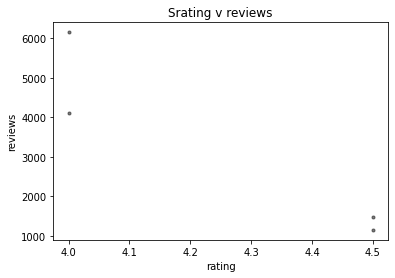

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


[1165.0, 2136.0, 132.0, 65.0, 1155.0, 476.0, 1066.0, 73.0, 115.0]
[4.0, 4.0, 4.0, 4.5, 3.5, 4.0, 4.0, 4.5, 4.0]


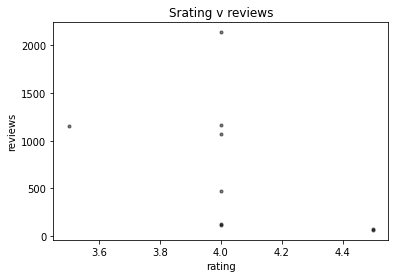

In [32]:
plot_man = plot_review_rating("New York, NY" , filtered_manhattan)
plot_brook = plot_review_rating("Brooklyn, NY" , filtered_brooklyn)

function 2 could be useful to see how ratings and reviews among the qualified resturants interact.  If they are making straws maybe the are looking for companies with lots of reviews and a certain threshold of a rating.  To help spread the word via word of mouth.

## Problem 2a

MuseX is a music publisher that tracks the royalties of thousands of songs around the world. Currently, they have no analyst on hand, but would like to hire one. Before hiring, they would like to know if and how their data could be used for data analysis, particularly for predicting whether or not a song brings in more than \$10,000. MuseX has given you the file 2018MusicData.csv as a set of sample data. 

Assess the quality of the data and prepare it for analysis
- Note all steps you took to prepare the data.
- List questions that you have for MuseX regarding the data

In [37]:
import pandas as pd
import numpy as np
df = pd.read_csv('2018MusicData.csv')

In [38]:
df.shape

(18992, 17)

In [42]:
df.head()

,Unnamed: 0,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,revenue
0,0,The Devil's Bleeding Crown,14.0,238653.0,0.000018,0.550,0.917,0.214000,7.0,0.0333,-4.575,1.0,0.0378,109.552,3.0,0.245,4038.0
1,1,BlowinUpTheSpot,24.0,122000.0,0.000807,0.662,0.725,0.899000,9.0,0.1700,-6.080,0.0,0.0801,96.106,4.0,0.419,15505.0
2,2,"I Can't Help Myself (Sugar Pie, Honey Bunch)",57.0,166466.0,0.197000,0.692,0.633,0.000000,0.0,0.0929,-7.733,1.0,0.0291,126.812,4.0,0.965,4632.0
3,3,Mambo Gozon,40.0,168986.0,0.056200,0.711,0.430,0.883000,4.0,0.2580,-15.717,0.0,0.0816,104.986,4.0,0.602,8103.0
4,4,Unfinished Business,45.0,215405.0,0.527000,0.607,0.581,0.000107,0.0,0.0980,-6.157,0.0,0.1350,179.823,4.0,0.668,2920.0


In [41]:
df.describe()

,Unnamed: 0,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,revenue
count,18992.000000,18978.000000,1.897800e+04,18978.000000,18978.000000,18973.000000,18973.000000,18973.000000,18973.000000,18973.000000,18973.000000,18973.000000,18978.000000,18978.000000,18978.000000,18978.000000
mean,9495.500000,52.967067,2.181796e+05,0.258499,0.633383,0.644746,0.077945,5.285406,0.179717,-7.448687,0.628209,0.102137,121.062836,3.959216,0.528025,18509.842186
std,5482.662492,21.919079,5.981300e+04,0.288722,0.156842,0.214052,0.221545,3.615111,0.144061,3.828909,0.483296,0.104452,28.741367,0.298636,0.244634,25091.714942
min,0.000000,0.000000,1.200000e+04,0.000001,0.000000,0.001070,0.000000,0.000000,0.010900,-38.768000,0.000000,0.000000,0.000000,0.000000,0.000000,2000.000000
25%,4747.750000,40.000000,1.844312e+05,0.024100,0.533000,0.509000,0.000000,2.000000,0.092900,-9.046000,0.000000,0.037800,98.286250,4.000000,0.335000,4696.000000
50%,9495.500000,55.000000,2.112400e+05,0.133000,0.645000,0.674000,0.000011,5.000000,0.122000,-6.555000,1.000000,0.055500,120.013000,4.000000,0.527000,7400.000000
75%,14243.250000,69.000000,2.427028e+05,0.423750,0.748000,0.814000,0.002570,8.000000,0.222000,-4.909000,1.000000,0.119000,139.932750,4.000000,0.725000,12385.000000
max,18991.000000,100.000000,1.799346e+06,0.996000,0.987000,0.999000,0.997000,11.000000,0.986000,1.585000,1.000000,0.941000,242.318000,5.000000,0.984000,99994.000000


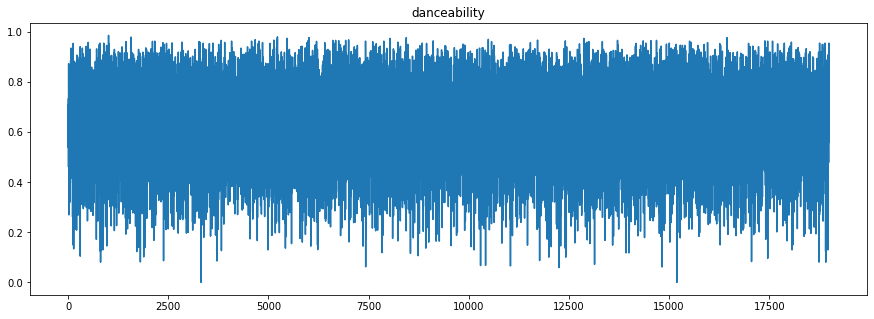

In [47]:
plt.figure(figsize=(15,5))
plt.title('danceability')
plt.plot(df["danceability"])

In [45]:
len(df[df.duplicated(['song_name'])])

5927

Steps Taken to Prepare Data:

Questions for MuseX:
I want to know how are things like danceability, energy and liveability judged.  IT could very much affect overall money if it is people within the app?

Is revenue measured in dollars?

Also there are a lot of duplicate song names, but without albums and artists it is impossible to tell if they are duplicates or songs with the same name

## Problem 2b

MuseX realized their data does not include information about artist, album, and playlist. They end up getting this information in another .csv called 2018SongInfo.csv which has four data fields:
- song_name
- artist_name
- album_name
- playlist

They believe that there could be more instances where this occurs (i.e. there is additional data they want to add but did not have before).

Consider a third dataset they might want to add and how they could retrieve. From there, provide a recommendation on whether or not to store their data in a SQL, noSQL, or File Systems database and describe your reasoning. For whiever recommendation you go with, describe the schema in the context of three datasets.

In [ ]:
# Code goes here (if needed)

Answer Goes Here: 
I think that they should go with SQL because there is so much data and the relational tables make most sense.  It would be easy to set up keys within these tables since artists and song titles would be unique.  

Table one would be as such due to the quantity of information and quick access to many variables that are likely to influence amount of money made, such as danceability and popularity

from there table 2 would be linked be song_name which would be the identifier/link it would include 
song_name
artist_name
album_name
playlist

The third table can be filled in as needed in the SQL format 